> __Content created under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

# 04 - Statistics and Monte-Carlo Models

Monte Carlo models use random numbers to either understand statistics or generate a solution [1]. 
The main element in a Monte Carlo model is the use of random numbers. Monte Carlo methods are very useful if you can easily execute a function lots of time or even in parallel. 

We can generate random numbers in many ways, but most programming languages have 'pseudo'-random number generators. 

In Python, we use the [NumPy random
library](https://numpy.org/doc/stable/reference/random/index.html) as such

In [1]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()

x = rng.random(20)
x

array([0.49188568, 0.04247736, 0.90806809, 0.77055392, 0.36055678,
       0.80198474, 0.32170313, 0.12093926, 0.60353763, 0.47958103,
       0.83090789, 0.83608809, 0.36122829, 0.87548374, 0.5359996 ,
       0.33206022, 0.41584374, 0.88931621, 0.45342678, 0.65530542])

NumPy's random number generator (`rng`) creates random numbers that can
be [uniformly
distributed](https://en.wikipedia.org/wiki/Continuous_uniform_distribution),
[normally
distributed](https://en.wikipedia.org/wiki/Normal_distribution), and
[much
more](https://numpy.org/doc/stable/reference/random/generator.html#distributions).
The call to `rng.random(20)` created 20 uniformly random numbers between
0 and 1 saved as the variable `x`. Next, you can plot the histogram of
`x`.

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

(array([2., 4., 5., 2., 7.]),
 array([0.04247736, 0.21559551, 0.38871365, 0.5618318 , 0.73494994,
        0.90806809]),
 <BarContainer object of 5 artists>)

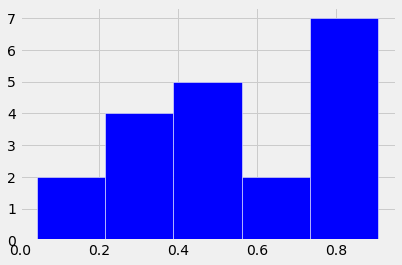

In [3]:
plt.hist(x, bins = 5, 
            color = 'b', 
            histtype = 'bar', 
            edgecolor = 'w')

The pyplot function `hist` displays a histogram of these randomly generated numbers.

## Exercise and Discussion

Try generating more random numbers and plotting histograms of the results i.e. increase `10` to larger values. 

What should the histogram of `x` look like if Python is generating truly random numbers?

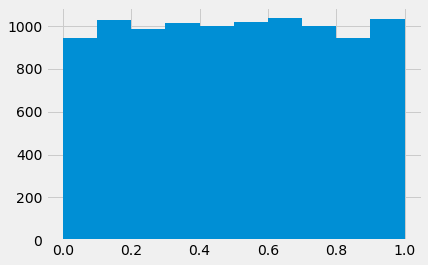

In [4]:
x=np.random.rand(10000)
plt.hist(x);

## Examples of Monte Carlo models:

Monte Carlo models have a wide array of applications. We are going to use Monte Carlo models in later modules to explore how uncertainty in measurements can be incorporated into computational models. The three main applications for Monte Carlo models are used in three main classes: optimization, numerical integration, and generating population distributions [1]. 

Here is a brief list of Monte Carlo model use cases in real-world applications:

- [Eigenvlaues in supercritical systems](https://link.springer.com/chapter/10.1007%2FBFb0049064)
- [average time between failures for reliability](http://www.egr.msu.edu/~mitraj/research/pubs/proc/singh-mitra_em_stdby_ias95.pdf)
- disordered materials (physics)
- [Calculation of the energy output of a wind farm](http://www.mdpi.com/1996-1073/9/4/286/pdf)
- [US Coast Guard rescue missions](https://en.wikipedia.org/wiki/Search_and_Rescue_Optimal_Planning_System)
- [Radiation shielding](http://www.sciencedirect.com/science/article/pii/S0920379612000580)
- [Predict number of asteroids that hit body of water](https://cneos.jpl.nasa.gov/sentry/intro.html)
- [Financial modeling](https://en.wikipedia.org/wiki/Monte_Carlo_methods_in_finance)

We will explore Monte Carlo modeling through the use of three examples:

1. Calculate the value of $\pi$

2. Simulate Brownian motion of particles in fluids

3. Propagate uncertainty in manufacturing into uncertainty in failure load


## Example 1: Calculate $\pi$ with random numbers. 

Assuming we can actually generate random numbers (a topic of philosophical and heated debates) we can populate a unit square with random points and determine the ratio of points inside and outside of a circle.

![Unit circle and unit square](../images/MonteCarloPi.gif)

![1/4 Unit circle and 1/4 unit square](../images/MonteCarloPi_rand.gif)


The ratio of the area of the circle to the square is:

$\frac{\pi r^{2}}{4r^{2}}=\frac{\pi}{4}$

So if we know the fraction of random points that are within the unit circle, then we can calculate $\pi$

(number of points in circle)/(total number of points)=$\pi/4$

In [5]:
np.random.rand(10)

array([0.62091134, 0.93722253, 0.27975792, 0.36615243, 0.80898771,
       0.71890793, 0.07488136, 0.09026944, 0.97400405, 0.20756591])

In [6]:
def montecarlopi(N):
    '''Create random x-y-coordinates to and use ratio of circle-to-square to 
    calculate the value of pi
    i.e. Acircle/Asquare = pi/4
    Arguments
    ---------
    N: number of random points to produce between x=0-1 and y=0-1
    
    Returns
    -------
    our_pi: the best prediction of pi using N points
    '''
    

    x=np.random.rand(N,1);
    y=np.random.rand(N,1);
    R=np.sqrt(x**2+y**2); # compute radius
    num_in_circle=sum(R<1);
    total_num_pts =len(R);
    our_pi = 4*num_in_circle/total_num_pts;
    return our_pi

In [7]:
test_pi=np.zeros(10)
for i in range(0,10):
    test_pi[i]=montecarlopi(1000);

print('mean value for pi = %f'%np.mean(test_pi))
print('standard deviation is %f'%np.std(test_pi))
print('actual pi is %f'%np.pi)

mean value for pi = 3.133200
standard deviation is 0.058544
actual pi is 3.141593


## Exercises

1. Why is there a standard deviation for the value of $\pi$ calculated with a Monte Carlo method? Does it depend upon how many times you run the function i.e. the size of `test_pi`? or the number of random points `N`? Alter the script above to discover correlations

2. How well does our function `montecarlopi` converge to the true value
of $\pi$ (you can use `np.pi` as a true value)? Plot the convergence as
we did in [03-Numerical_error](../module_01/03-Numerical_error)

In [8]:
test_pi=np.zeros(100)
for i in range(0,100):
    test_pi[i]=montecarlopi(1000);

print('mean value for pi = %f'%np.mean(test_pi))
print('standard deviation is %f'%np.std(test_pi))
print('actual pi is %f'%np.pi)

mean value for pi = 3.139920
standard deviation is 0.046603
actual pi is 3.141593


Compare the above 100 `test_pi` cases each 1000 points. 

to the below 10 `test_pi` cases each 10,000 points.

Above, the std is the same as before $\approx 0.05$

Below, the std is decreased to $\approx 0.01$

In [9]:
test_pi=np.zeros(10)
for i in range(0,10):
    test_pi[i]=montecarlopi(10000);

print('mean value for pi = %f'%np.mean(test_pi))
print('standard deviation is %f'%np.std(test_pi))
print('actual pi is %f'%np.pi)

mean value for pi = 3.135400
standard deviation is 0.018889
actual pi is 3.141593


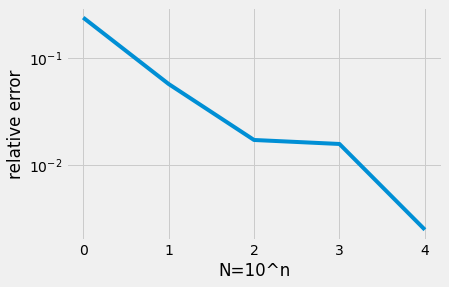

In [10]:
N=np.arange(0,5)
error = np.zeros(len(N))

for n in N:
    mypi = np.zeros(10)
    for i in range(0,10):
        mypi[i]=montecarlopi(10**n)
    mupi = np.mean(mypi)
    error[n] = np.abs(np.pi-mupi)/np.pi
plt.semilogy(N,error)
plt.xlabel('N=10^n')
plt.ylabel('relative error');

## Example 2: Simulate Brownian motion of particles in a fluid 

[Brownian motion](https://www.britannica.com/science/Brownian-motion)
was first documented by Robert Brown, a Scottish botanist in 1827. It is
a description of how large particles move and vibrate in fluids that
have no buld motion. The atoms from the fluid bounce off the suspended
particles to jiggle them randomly left and right. Take a look at [Up and
Atom's video](https://www.youtube.com/channel/UCSIvk78tK2TiviLQn4fSHaw)
for more information in the physics and history of the phenomenon.

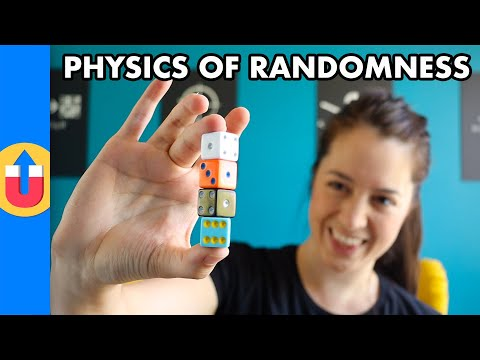

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('5jBVYvHeG2c')

In this example, your goal is to predict the location of 50 particles
if they take 100 random steps from -0.5 to 0.5 $\mu m$ in the x- and
y-directions. 

### Exercise (Discussion)

If the steps are uniformly random and can be positive or negative, where
do you _expect_ the particle to be after 100 steps? Will it be back to
where it started? or will it migrate to somewhere new?

### Generate your Brownian motion

Here, we are simplifying the physics of the Brownian motion (ignoring
the details in the transfer of momentum from small to large particles)
and just assuming each step in the x- and y-directions are  -0.5 to 0.5
$\mu m$. Here is the Monte Carlo process:

1. generate 2 sets of 100 random numbers between -0.5 to 0.5 for
$Delta x$ and $\Delta y$. 
2. create an array with 100 locations, the first is at the origin (0, 0)
3. take a cumulative sum of the $\Delta x$ and $\Delta y$ steps to find
the location at each step
4. plot the results

Here, you create the 100 random numbers and shift them by 0.5.

In [12]:
rng = default_rng()
N_steps = 100
dx = rng.random(N_steps) - 0.5
dy = rng.random(N_steps) - 0.5

Next, create the positions at each step.

In [13]:
r = np.zeros((N_steps, 2))

Now, use
[`np.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)
to find the final position after each step is taken.

In [14]:
r[:, 0] = np.cumsum(dx) # final rx position
r[:, 1] = np.cumsum(dy) # final ry position

Finally, you can plot the path the particle took as it moved along its
100 steps and its final location.

Text(0, 0.5, 'y-position (um)')

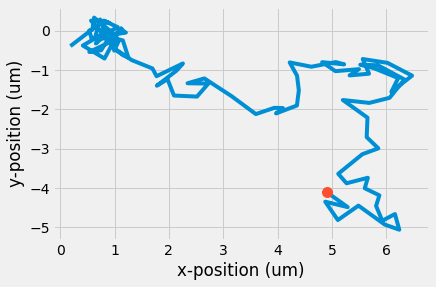

In [15]:
plt.plot(r[:, 0 ], r[:, 1])
plt.plot(r[-1, 0], r[-1, 1], 'o', markersize = 10)
plt.xlabel('x-position (um)')
plt.ylabel('y-position (um)')

A curious result, even though we prescribed random motion, the final
location did not end up back at the origin, where it started. __What if
you looked at 50 particles?__ How many would end up back at the origin?
Use a for-loop to calculate the position of 50 particles taking 100
steps each.

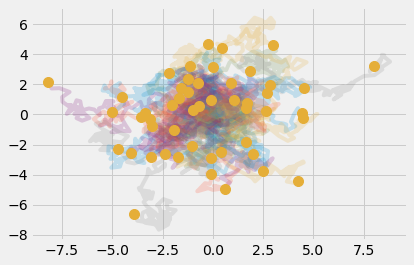

In [16]:
num_particles = 50
r_final = np.zeros((num_particles, 2))
for i in range(0, num_particles):
    dx = rng.random(N_steps) - 0.5
    dy = rng.random(N_steps) - 0.5

    r = np.zeros((N_steps, 2))

    r[:, 0] = np.cumsum(dx)
    r[:, 1] = np.cumsum(dy)
    r_final[i, :] = r[-1, :]

    plt.plot(r[:, 0 ], r[:, 1], alpha = 0.2)
plt.plot(r_final[:, 0], r_final[:, 1], 'o', markersize = 10)

### Exercise
Calculate the average location of the particles. What is the standard
deviation?

## Exercise

Compare the scaled histogram to the original histogram. What is similar? What is different?

Make a scaling equation to get uniformly random numbers between 10 and 20. 

_The scaling keeps the bin heights constant, but it changes the width and location of the bins in the histogram. Scaling to 10-20 shows a more extreme example._

### Example 3: Determine uncertainty in failure load based on geometry uncertainty

In this example, we know that a steel bar will break under 940 MPa tensile stress. The bar is 1 mm by 2 mm with a tolerance of 10 %. What is the range of tensile loads that can be safely applied to the beam?

$\sigma_{UTS}=\frac{F_{fail}}{wh}$

$F_{fail}=\sigma_{UTS}wh$

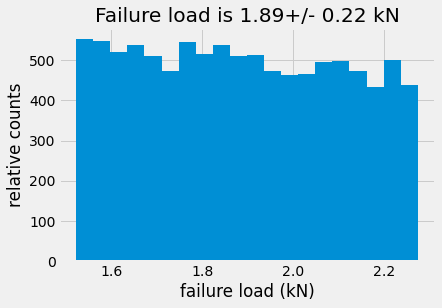

In [17]:
N=10000;
r=np.random.rand(N,1);
wmean=1; # in mm
wmin=wmean-wmean*0.1;
wmax=wmean+wmean*0.1;
hmean=2; # in mm
hmin=hmean-hmean*0.1;
hmax=hmean+hmean*0.1;

wrand=wmin+(wmax-wmin)*r;
hrand=hmin+(hmax-hmin)*r;

uts=940; # in N/mm^2=MPa

Ffail=uts*wrand*hrand*1e-3; # force in kN
plt.hist(Ffail,bins=20,)
plt.xlabel('failure load (kN)')
plt.ylabel('relative counts')
plt.title('Failure load is {:.2f}+/- {:.2f} kN'.format(np.mean(Ffail),np.std(Ffail)));

Normally, the tolerance is not a maximum/minimum specification, but
instead a normal distribution that describes the standard deviation, or
the 68% confidence interval.

So instead, you should generate normally distributed dimensions.

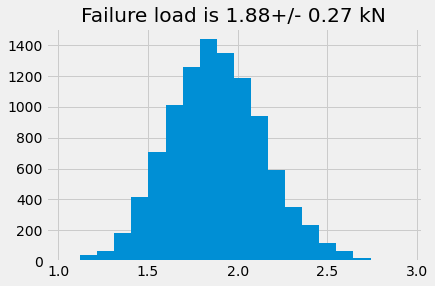

In [18]:
N=10000;
wmean=1; # in mm
wstd=wmean*0.1; # standard deviation in mm
hmean=2; # in mm
hstd=hmean*0.1; # standard deviation in mm


wrand=np.random.normal(wmean,wstd,size=N);
hrand=np.random.normal(hmean,hstd,size=N);
uts=940; # in N/mm^2=MPa

Ffail=uts*wrand*hrand*1e-3; # force in kN
plt.hist(Ffail,bins=20)
#plt.xlabel('failure load (kN)')
#plt.ylabel('relative counts')
plt.title('Failure load is {:.2f}+/- {:.2f} kN'.format(np.mean(Ffail),np.std(Ffail)));

In this propagation of uncertainty, the final value of failure load seems to be independent of wheher the distribution is uniformly random or normally distributed. In both cases, the failure load is $\approx 1.9 \pm 0.25$ kN.

The difference is much more apparent if you look at the number of occurrences that failure will occur whether the dimensions are uniformly random or normally distributed. 

For the uniformly random case, there are approximately 500 parts out of 10,000 that will fail at 1.9 kN. 

For the normally distributed case, there are approximately 1500 parts out of 10,000 that will fail at 1.9 kN. 

## Where does a normal distribution come from?

"Everybody believes in the exponential law of errors: the experimenters, because they think it can be proved by mathematics; and the mathematicians, because they believe it has been established by observation" [5].

In the previous example, we drew dimensions from uniformly random distributions and normally distributed random distributions. Why do we use the "normal" distribution to describe data with a mean and standard deviation? There are exact statistical methods to derive the normal distribution, but let's take a look at a Monte Carlo approach. 

Let's say there are 10 different independent factors that could change the dimensions of the steel bar in question e.g. which tool was used, how old the blade is, the humidity, the temperature, and the list goes on. 

Let's consider one dimension. 
Each of these factors could change the dimensions of the part, let's use a uniform scale of -1/2-1/2.
If the effect is 0, the dimension is exactly as specified. If the effect is -1/2, the dimension is much smaller. Conversely, if the effect is 1/2 the dimension is much larger. Now, we use a Monte Carlo model to generate 10 effects on 10,000 parts as shown in the next block.

In [19]:
factors = np.random.rand(10000,10)-1/2 # each row represents a part and each column is an effect (-1/2-1/2)

Now, we have created 10,000 parts with 10 uniformly random effects between -1/2-1/2. 

We sum the effects and look at the final part distribution. The x-axis is labeled "A.U." for arbitrary units, we are just assuming an effect of -1/2-1/2 for each of the 10 factors.

Text(0, 0.5, 'number of parts')

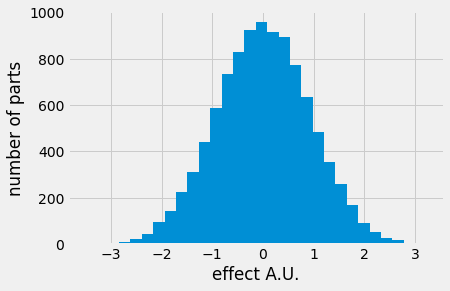

In [20]:
dims = np.sum(factors,axis=1)

plt.hist(dims,30)
plt.xlabel('effect A.U.')
plt.ylabel('number of parts')

Now, depending upon which random numbers were generated, you should see what looks like a normal distribution. 

Normal distributions come from the assumption that we have a large (or infinite) number of uncontrollable factors that can change our desired result. In our case, ideally each factor would have an effect of 0, because then it is exactly as specified, but the reality is that we can't control most factors. As engineers, we always have to consider the uncertainty in our models and measurements. 

## What you've learned:

* How to generate "random" numbers in Python$^+$
* The definition of a Monte Carlo model
* How to calculate $\pi$ with Monte Carlo
* How to model Brownian motion with Monte Carlo
* How to propagate uncertainty in a model with Monte Carlo
* How to generate a normal distribution using uniformly random numbers

$^+$ Remember, the computer only generates pseudo-random numbers. For further information **and** truly random numbers  check [www.random.org](https://www.random.org/randomness/) 

## References

1. [Why the Monte Carlo method is so important today
Dirk P. Kroese, Tim Brereton *et al.* Wiley Interdisciplinary Reviews: Computational Statistics, 6, 6, 11 2014](https://onlinelibrary.wiley.com/doi/full/10.1002/wics.1314)

2. [Wikipedia: Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration)

3. [Weinzierl, S. (2000). "Introduction to Monte Carlo methods"](https://arxiv.org/abs/hep-ph/0006269)

4. Meurer A, _et al._ (2017) SymPy: symbolic computing in Python. PeerJ Computer Science 3:e103 https://doi.org/10.7717/peerj-cs.103

5. Whittaker, E. T. and Robinson, G. "Normal Frequency Distribution." Ch. 8 in The Calculus of Observations: A Treatise on Numerical Mathematics, 4th ed. New York: Dover, p. 179, 1967.

# Problems

__1.__ [Buffon's needle problem](https://en.wikipedia.org/wiki/Buffon) is
another way to estimate the value of $\pi$ with random numbers. The goal
in this Monte Carlo estimate of $\pi$ is to create a ratio that is close
to [3.1415926...](http://www.math.com/tables/constants/pi.htm) _similar
to the example with darts points lying inside/outside a unit circle
inside a unit square._ 

![Buffon's needle for parallel
lines](https://upload.wikimedia.org/wikipedia/commons/f/f6/Buffon_needle.gif)

In this Monte Carlo estimation, you only need to know two values:
- the distance from line 0, $x = [0,~1]$
- the orientation of the needle, $\theta = [0,~2\pi]$

The y-location does not affect the outcome of crosses line 0 or not
crossing line 0. 

__a.__ Generate 100 random `x` and `theta` values _remember_ $\theta =
[0,~2\pi]$

__b.__ Calculate the x locations of the 100 needle ends e.g. $x_end = x
\pm \cos\theta$ _since length is unit 1. 

__c.__ Use 
[`np.logical_and`](https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html)
to find the number of needles that have minimum $x_{end~min}<0$ and
maximum $x_{end~max}>0$. The ratio
$\frac{x_{end~min}<0~and~x_{end~max}>0}{number~of~needles} =
\frac{2}{\pi}$ _for large values of $number~of~needles$_.

__2.__ 100 steel rods are going to be used to support a 1000 kg structure. The
rods will buckle when the load in any rod exceeds the [critical buckling
load](https://en.wikipedia.org/wiki/Euler%27s_critical_load)

$P_{cr}=\frac{\pi^3 Er^4}{16L^2}$

where E=200e9 Pa, r=0.01 m +/-0.001 m, and L is the 
length of the rods supporting the structure. Create a Monte
Carlo model `montecarlo_buckle` that predicts 
the mean and standard deviation of the buckling load for 100
samples with normally distributed dimensions r and L. 

```python
mean_buckle_load,std_buckle_load=\
montecarlo_buckle(E,r_mean,r_std,L,N=100)
```

__a.__ What is the mean_buckle_load and std_buckle_load for L=5 m?

__b.__ What length, L, should the beams be so that only 2.5% will 
reach the critical buckling load?

In [21]:
def montecarlo_buckle(E,r_mean,r_std,L,N=100):
    '''Generate N rods of length L with radii of r=r_mean+/-r_std
    then calculate the mean and std of the buckling loads in for the
    rod population holding a 1000-kg structure
    Arguments
    ---------
    E: Young's modulus [note: keep units consistent]
    r_mean: mean radius of the N rods holding the structure
    r_std: standard deviation of the N rods holding the structure
    L: length of the rods (or the height of the structure)
    N: number of rods holding the structure, default is N=100 rods
    Returns
    -------
    mean_buckle_load: mean buckling load of N rods under 1000*9.81/N-Newton load
    std_buckle_load: std dev buckling load of N rods under 1000*9.81/N-Newton load
    '''
    
    return mean_buckle_load, std_buckle_load

__3.__ Generate your own normal distribution using uniformly random numbers between -1/2 and 1/2. 

__a.__ What is the effect of changing the number of factors?

__b.__ What is the effect of changing the number of samples?

*Hint: for a-b try plotting histograms of the results.*

__c.__ How would you change the mean in your generated distribution?